# ridge regression

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error



In [ ]:
np.random.seed(42)
m=20
x=3*np.random.rand(m,1)
y=1+0.5*x+np.random.randn(m,1)/1.5
x_new=np.linspace(0,3,100).reshape(100,1)

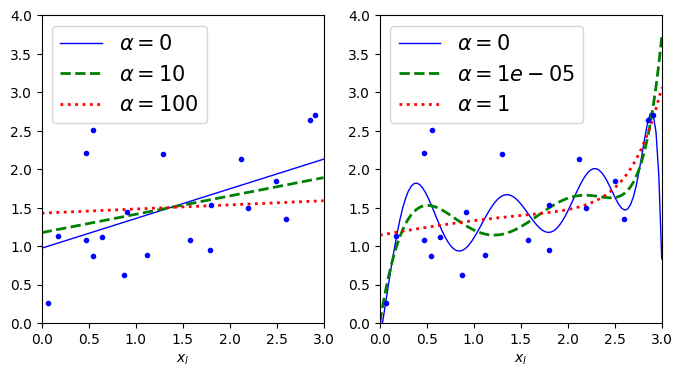

In [ ]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("Std_scaler", StandardScaler()),
                ("regul_reg", model)
            ])
        model.fit(x, y)
        y_new_regul = model.predict(x_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(x_new, y_new_regul, style, linewidth=lw, label=r"$\alpha={}$".format(alpha))
    plt.plot(x, y, "b.", linewidth=3)
    plt.legend(fontsize=15)
    plt.xlabel("$x_l$")
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100))
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1))
plt.show()


In [ ]:
ridge_reg=Ridge(alpha=1,solver="cholesky",random_state=42)
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [ ]:
ridge_reg.intercept_

array([1.00650911])

In [ ]:
ridge_reg.coef_

array([[0.36280369]])

In [ ]:
print("theta0="+str(ridge_reg.intercept_))
print("theta1="+str(ridge_reg.coef_))

theta0=[1.00650911]
theta1=[[0.36280369]]


#Lasso regression


In [ ]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


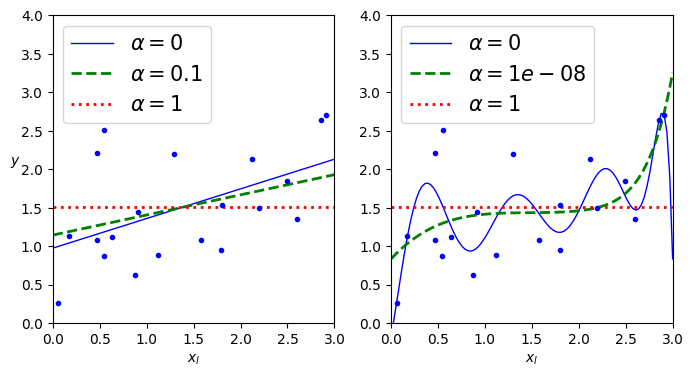

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso,polynomial=False,alphas=(0,0.1,1),random_state=42)
plt.ylabel("$y$",rotation=0)
plt.subplot(122)
plot_model(Lasso,polynomial=True,alphas=(0,10**-8,1),random_state=42)
plt.show()

# Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [ ]:
np.random.seed(42)
m=100
x=6*np.random.rand(m,1)-3
y=2 + x +0.5* x**2+ np.random.randn(m,1)

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x[:50],y[:50].ravel(),test_size=0.5,random_state=10)

In [ ]:
poly_scaler=Pipeline([
                ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                ("Std_scaler", StandardScaler())
])

In [ ]:
x_train_poly_scaled=poly_scaler.fit_transform(x_train)
x_val_poly_scaled=poly_scaler.transform(x_val)

In [ ]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.0005, warm_start=True, learning_rate="constant", random_state=42)


In [ ]:
train_errors=[]
val_errors=[]
for epoch in range(500):
  sgd_reg.fit(x_train_poly_scaled,y_train)
  y_train_predict=sgd_reg.predict(x_train_poly_scaled)
  y_val_predict=sgd_reg.predict(x_val_poly_scaled)
  train_errors.append(mean_squared_error(y_train,y_train_predict))
  val_errors.append(mean_squared_error(y_val,y_val_predict))

In [ ]:
best_epoch=np.argmin(val_errors)
best_val_epoch=np.sqrt(val_errors[best_epoch])

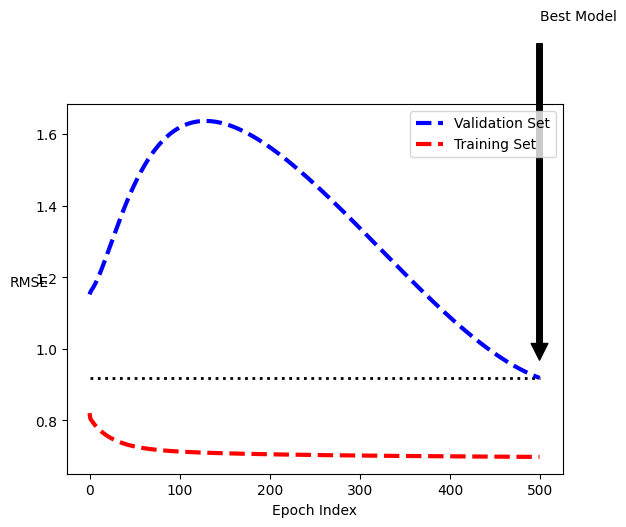

In [ ]:
plt.annotate('Best Model', xy=(best_epoch, best_val_epoch), xytext=(best_epoch, best_val_epoch + 1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot([0, 500], [best_val_epoch, best_val_epoch], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b--", linewidth=3, label="Validation Set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=3, label="Training Set")
plt.legend()
plt.xlabel("Epoch Index")
plt.ylabel("RMSE", rotation=False)
plt.show()
